#  План действий по удержанию клиентов фитнес-центров «Культурист-датасаентист» 

<div style="background-color:MintCream; border:solid CadetBlue 2px; padding: 20px">
Привет, Екатерина! Меня зовут Панкратова Дарья, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно – дай знать, и мы перейдем на «вы». Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе.

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(    
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы   
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. 
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>
 

Работая аналитиком данных при фитнес-центре «Культурист-датасаентист» передо мной была поставлена задача разработать план по удержанию клиентов.Для достижения этой цели мной был:
 * спрогонозирован отток клиентов(будем считать, что если клиент месяц не пользовался нашими услугами, то он находится в оттоке);
 * составлени портрет "типичного" клиента нашего фитнес-центра;
 * определены основные причины оттока;
 * подготовлены рекомендации для более эффективного взаимодействия с клиентами

Содержание:
1. [Загрузка данных](#start)
2. [Проведение исследовательского анализа данных (EDA)](#eda)
* [Изучение средних значений и стандартного отклонения ](#mean_std)
* [Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#groups)
* [Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл и тех, кто остался](#bar_chat)
* [Построение матрицы корреляций](#correlation_matrix)
3. [Построение модели прогнозирования оттока клиентов](#model)
* [Разделение данных на обучающую и валидационную выборку функцией train_test_split()](#split)
* [Обучение модели на train-выборке логистической регрессией](#logistic_regression)
* [Обучение модели на train-выборке случайным лесом](#random_forest)
* [Оценка метрики accuracy, precision и recall для обеих моделей на валидационной выборке.](#train_values)
4.[Кластеризация клиентов](#cluster)
* [Стандартизация данных](#standardization)
* [Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы](#linkage_dendrogram)
* [Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов](#kmeans)
* [Изучение средних значений признаков для кластеров](#mean_cluster)
* [Построение распределения признаков для кластеров](#cluster)
* [Посчет доли оттока для каждого кластера](#cluster_outflow)
5.[Формулирование выводов и создание базовыех рекомендаций по работе с клиентами](#conclusion)

<a id="start"></a>
# 1. Загрузка данных

Перед началом нашей работы с данными, импортируем нужные для работы библиотеки:
   * pandas
   * matplotlib.pyplot
   * seaborn
   * numpy 
   * sklearn.model_selection
   * sklearn.linear_model
   * sklearn.ensemble
   * sklearn.preprocessin
   * sklearn.metrics
   * scipy.cluster.hierarchy
   * sklearn.cluster
   * itertools
   * pandas_profiling

In [1]:
# импортируем библиотеки
!pip install pandas-profiling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
from pandas_profiling import ProfileReport

     |████████████████████████████████| 315 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 58.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 86.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 83.0 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=0e4ed7a4015fc448cf49e4739559b51c4721bc68a972497ba2d8545b001d5c5a
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


<div class="alert alert-success">
<b>👍 Успех:</b> Все импорты на месте
</div>

Итак, данные для анализа нам предоставили в csv-файле, который мы сохраним в переменную data. Датасет  у нас содержит данные на месяц до оттока и факт оттока на определённый месяц. 

In [2]:
# загружаем данные
try:
    data = pd.read_csv('C:/Users/vaska/Desktop/project2/gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Измени, пожалуйста путь на правильный. Если хочется, чтобы работало и для локального пути и тут можно использовать конструкцию: 
</div>


```python
try:
    pd.read_csv('C:/Users/vaska/Desktop/project2/gym_churn.csv')
except:
    pd.read_csv('.....')
```


или

```python
import os.path
os.path.exists(file_path)
```

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо большое, исправила!</div>

<a id="eda"></a>
# 2. Проведение исследовательского анализа данных (EDA)

Перед началом анализа данных полезно оценить качество данных -  провести исследовательский анализ данных(EDA). На этом этапе вы выявим специфику нашего датасета. 

<a id="mean_std"></a>
## Изучение средних значений и стандартного отклонения 

Пишем функцию, которая будет выводить первые 5 строк таблицы, её размер,информацию, среднее, стандартное отклонение, а также количество дубликатов.

In [3]:
# создаем функцию function  
def function(df):
    print ('------------- Краткая информация ------------')
    display(df.head())
    print('Размер таблицы:', df.shape)
    df.info()
    print(df.describe())
    print('Количество дубликатов:', df.duplicated().sum())

In [4]:
# вызываем таблицу data
function(data)

------------- Краткая информация ------------


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

Размер таблицы: (4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total    

<div class="alert alert-success">
<b>👍 Успех:</b> Пропуски и дубликаты проанализированы. Ты хорошо владеешь инструментами первичной обработки
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Можешь еще попробовать <a href = "https://github.com/ydataai/pandas-profiling"> библиотеку pandas-profiling</a> Она может построить красивые отчеты о данных. Правда, она не установлена на тренажере. Но ее можно установить через команду !pip install pandas-profiling  
</div>

In [5]:
profile = ProfileReport(data, title="Pandas Profiling Report", progress_bar=False)
profile

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо, попробовала, попробую реализовать в следующий раз!</div>

Как видим, наш датафрейм довольно-таки большой - всего 4000 наблюдений и 14 полей — 13 признаков и целевая переменная. Все признаки у нас численные, а количество пропусков равно нулю. 

Выводы, которые можно сделать на данном этапе анализа:
 * самому молодому клиенту 18 лет, самому зрелому клиенту - 41 лет, средний возраст пользователей - 29 лет(стандартное отклонение равно 3);
 * телефон оставляет большинство пользователей - 90 %;
 * проживает рядом около 84 %(стандартное отклонение равно 0.36);
 * сотрудниками компаний-партнёров клуба является  48 %(стандартное отклонение равно 0.49);
 * друзей приводят в среднем 31 % клиентов нашего клуба(стандартное отклонение равно 0.46);
 * средняя длительность текущего действующего абонемента - около 5 месяцев(стандартное отклонение равно 4.5), средний срок до окончания текущего действующего абонемента - 4 месяца(стандартное отклонение равно 4);
 * среднее время с момента первого обращения в фитнес-центр - 4 месяца (стандартное отклонение равно 4);
 * средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза в неделю(стандартное отклонение равно 1). Примерно такие же показатели у средней частоты посещений в неделю за предыдущий месяц;
 * групповые занятия посещает примерно 41 % клиентов(стандартное отклонение равно 0.49);
 * суммарная выручка от других услуг фитнес-центра в среднем составляет 147 тыс.(стандартное отклонение равно 96);
 * в среднем отток в текущем месяце составил 26 % (стандартное отклонение равно 0.44)
 
  Аномальных отрицательных значений не обнаружено.

<div class="alert alert-warning"><div class="alert alert-warning">
Можно ли писать, что стандартное отклонение составило 44 %? Можно ли его вообще измерять в процентах?

<div class="alert alert-info">
<b>👂 Совет:</b> Стандартное отклонение тут вообще мало что дает, т.к. распределение совсем не похоже на нормальное. (1 или 0)
</div>

<div class="alert alert-warning"> <b>🎓 Комментарий студента:</b> Подскажи, пожалуйста, как ты по методу df.describe() поняла, что распределение не нормальное? Или ты основывалась на дальнейших полученных показателях?</div>

<div class="alert alert-info">
<b>😺 Комментарий ревьюера v2:</b> Это можно понять из описания задачи (т.к. мы решаем задачу бинарной классификации, а это целевой признак) из df.describe на прямую это не увидеть, но то что квантили совпадают с максимальном и минимальном значением может наводить на эту мысль. И в первых строках это подтверждается. Чтобы в этом убедиться можно воспользоваться методом <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=unique#pandas.DataFrame.nunique">nunique</a>
</div>

<a id="groups"></a>
## Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

Теперь изучим пользователей, которые остались с нами и тех, кто ушли. Сначала узнаем сколько людей у нас в каждой группе, их процентное количество. Затем посмотрим на средние значения в этих группах.

In [6]:
# узнаем количество пользователей в каждой группе
print('Количество оставшихся пользователей: {:.0f}, в процентах - {:.2%}'
      .format(len(data.query('Churn == 0')), len(data.query('Churn == 0'))/len(data)))
print('Количество пользователей,ушедших в отток: {:.0f}, в процентах - {:.2%}'
      .format(len(data.query('Churn == 1')), len(data.query('Churn == 1'))/len(data)))

Количество оставшихся пользователей: 2939, в процентах - 73.47%
Количество пользователей,ушедших в отток: 1061, в процентах - 26.52%


In [7]:
# выводим среднее значениям в двух группах 
data.groupby('Churn').mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

Выводы по нашим данным:
   * 73% пользователей осталось с нами, 27% ушло;
   * возраст отличается, но не значительно - постоянным пользователям зала около 30 лет, тем же, кто ушел в отток порядка 27 лет;
   * 30 % оставшихся пользователей пришли из акции 'приведи друга', что больше пользователей, которые использовал промокод от знакомого, но ушли в отток;
   * больше остается клиентов, которые являются сотрудниками компаний-партнёров клуба. Их в среднем 53 %; 
   * пользователи, ушедшие в отток в два раза меньше посещали групповые занятия, но это может быть связано с малым количеством; посещений в целом, по сравнению с теми, кто ходит в зал до сих пор;
   * ушедшие посетитель принесли меньше денег фитнес-центру, чем постоянные посетители;
   * пользователи, ушедшие в отток брали абонемент в среднем брали абонемент на небольшой период - 1 месяц;
   * пользователи, занимающиеся по сей день, наоборот, брали абонемент на 6 месяцев;
   * постоянные клиенты занимаются в среднем 2 раза в неделю, тогда как ушедшие в отток 1 раз

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично подмечены особенности групп ушедших и оставшихся.
</div>

<a id="bar_chat"></a>
## Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл и тех, кто остался

Теперь посмотрим на распределение числовых признаков, есть ли какие-то аномальные выбросы, а также рассчитаем матрицу корреляций.

Построим попарные столбчатые гистограммы, потому что корреляция отражает только линейную зависимость, а на попарных графиках можно увидеть другие взаимосвязи.

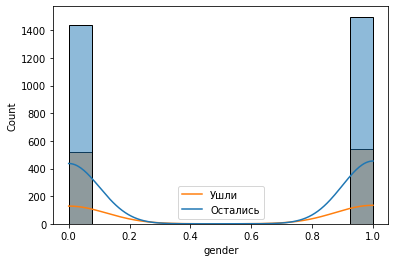

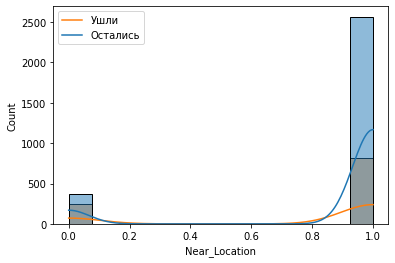

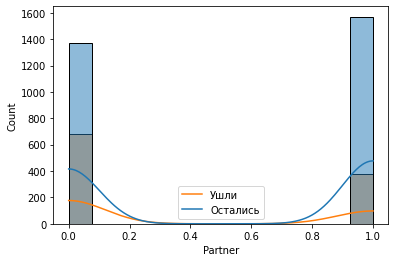

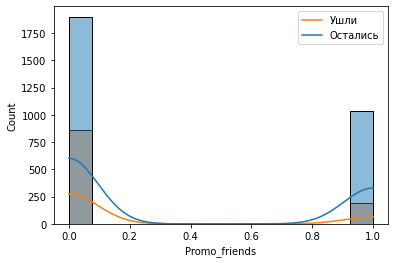

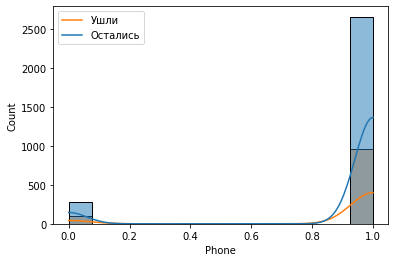

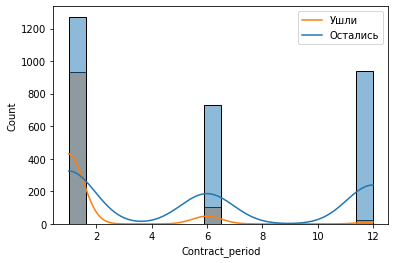

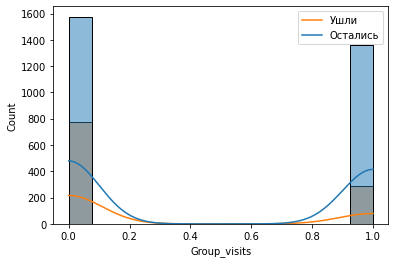

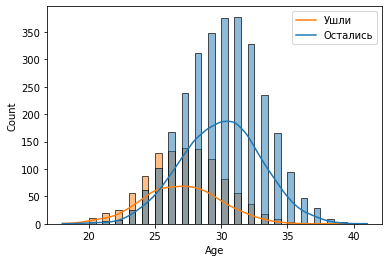

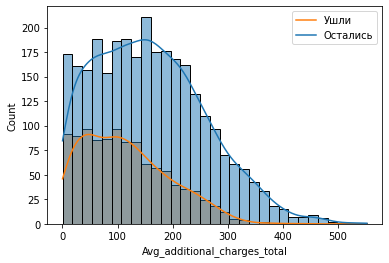

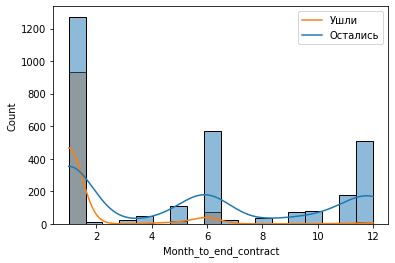

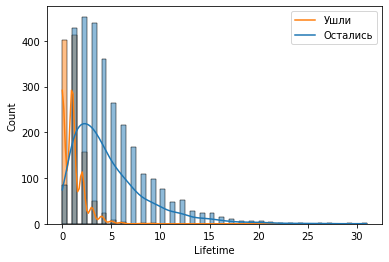

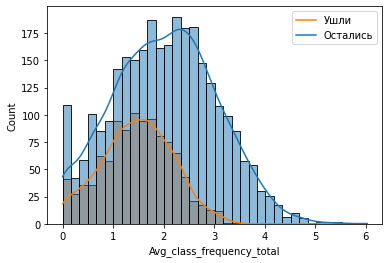

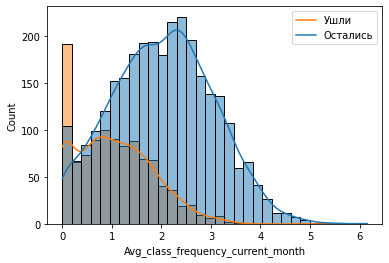

In [8]:
# построим попарные столбчатые гистограммы  признак-целевая переменная для каждого признака
for col in data.drop('Churn', axis = 1).columns:
    sns.histplot(data=data,x=data[col], hue="Churn", kde=True)
    plt.legend(['Ушли', 'Остались'])
    plt.show()

 <div class="alert alert-success">
<b>👍 Успех:</b> Хорошие визуализации
</div>

Выводы из графиков:
   * как и было отмечено ранее, люди, ушедшие от нашей компании брали абонемент на 1 месяц. Количество посетителей, закончивших заниматься при покупке абонемента на 6 месяцев крайне мало, у а тех, кто с нами на год, ушедших практически нет;
   * возраст ушедших в отток составляет 25-30 лет, оставшихся 30-33 года;
   
В общем и целом никакой новой зависимости или аномалий на графиках не наблюдается.


<div class="alert alert-warning"><div class="alert alert-warning">
Не совсем понятно, какие выводы можно сделать из первых графиков, где вертикальная диаграмма представляет из себя два столбца из точек 0.0 и 1.0 оси Х. Ушедшие пользователи у нас представлены оранжевым цветом, оставшиеся синим. Тогда не понятно, почему на оси Х столбцы только из 0 и 1, ведь оставшиеся и ушедшие в отток уже помечены цветом.

<div class="alert alert-info">
<b>👂 Совет:</b> 0, 1 - это пол мужской или женский, близко живет или нет и.т.д и в каждом столбце оранжевая часть (например женщин) осталась, а синяя часть ушла. В целом выводы можно не дублировать, т.к. ты все проанализировала по таблице.
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Точно, я что-то не сообразила, спасибо за пояснение:)
</div>

<a id="correlation_matrix"></a>
## Построение матрицы корреляций

Для того, чтоб узнать, какие признаки наиболее сильно коррелируют с целевой переменной построим матрицу корреляций.

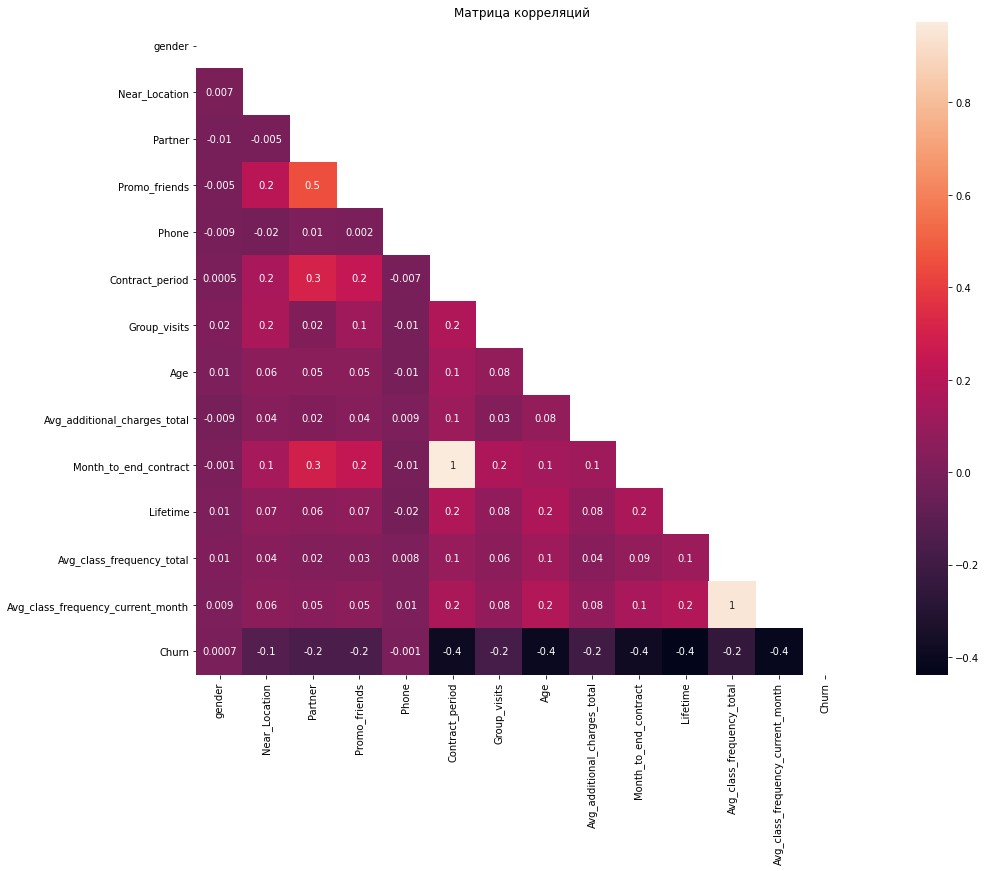

In [9]:
# вычисляем матрицу корреляций
corrMatrix =  np.triu(data.corr())
# задаем параметры тепловой карты
fig, ax = plt.subplots(1, figsize=(24,12))
#нарисуем тепловую карту для матрицы корреляций
sns.heatmap(data.corr(), annot=True, fmt='.1g', square=True, mask=corrMatrix)
# называем нашу гистограмму методом title()
plt.title('Матрица корреляций')
plt.show()

Как мы видим, признаки не особо сильно коррелируют друг с другом и для линейных моделей взаимная корреляция нежелательна. Единственные показатели, которые показывают максимальное значение корреляции - Avg_class_frequency_total и Avg_class_frequency_current_month, а также Month_to_end_contract с Contract_period.

<div class="alert alert-success">
<b>👍 Успех:</b> Матрица корреляции хорошо построена и проанализирована
</div>

<a id="model"></a>
# 3. Построение модели прогнозирования оттока клиентов

Далее мы построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

<a id="split"></a>
## Разделение данных на обучающую и валидационную выборку функцией train_test_split()

Итак, мы хотим обучить модель так, чтобы она предсказывала отток настоящих и будущих пользователей нашего клуба. Прежде чем передавать на вход модели действительные данные, нужно понять, хорошо ли она работает.Для этого мы обучим модель,а её прогнозы сравним с действительными целевыми переменными. Для этого напишем функцию, которая разделяет выборку на валидационную и тестовую. Перед этим все наши данные разделим на признаки и их целевую переменную. Затем, для того, чтоб привести данные к единому масштабу, мы применяем стандартизацию, которая придаст данным вид вид стандартного нормального распределения.

In [10]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [11]:
# разделяем модель на обучающую и валидациионную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<div class="alert alert-success">
<b>👍 Успех:</b>  Ты правильно разделила выборки. Хорошо, что не забыла параметр random_state.
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> 
Можно также использовать параметр stratify=y. Тогда наш датасет разделится так, чтобы и в трейне и в тесте пропорция ушедших\оставшихся клиентов была одинаковой.</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо за совет, применила новый параметр
</div>

In [12]:
# создаем объект класса StandardScaler и применяем его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

<div class="alert alert-warning"><div class="alert alert-warning">
Можешь, пожалуйста, объяснить, зачем нам нужен параметр random_state? В теории у нас сказано - '...чтобы ваши результаты во время учёбы были сопоставимы с результатами других студентов, при разделении выборки на обучающую и валидационную указывайте параметр random_state с нулевым значением...'.Получается, когда будет доходить дело до рабочих проектов, где мою правильность никто проверять не будет, кроме меня, то этот параметр можно не использовать?

<div class="alert alert-info">
<b>👂 Совет:</b>   Параметр random_state нужно указывать, чтобы результаты повторялись точно из раза в раз. Чтобы каждый раз, когда будешь запускать ноутбук не получались слегка разные метрики. А то можно получить немного разные результаты, когда смотришь сад и демонстрируешь свою работу. Потом будет проще отслеживать: изменение в метриках связаны с экспериментом или со случайностью. Поэтому старайся везде, где присутствует элемент случайности фиксировать random_state
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Теперь поняла, спасибо что разжевала, а то в интернете слишком запутанно было написано)
</div>

<a id="logistic_regression"></a>
## Обучение модели на train-выборке логистической регрессией


Для решения задачи бинарной классификации мы применяем логистическую регрессию. 

In [13]:
# задаем алгоритм для нашей модели
model = LogisticRegression(solver='liblinear', random_state=0)
# обучаем модель
model.fit(X_train_st,y_train)
# создаем бинарный прогноз
lr_predictions  = model.predict(X_test_st)

Теперь перейдем к случайному лесу.

<a id="random_forest"></a>
## Обучение модели на train-выборке случайным лесом


Особенность этого метода в том, что он генерирует множество различных независимых друг от друга параметров разными признаками, подвыборками и др., а на основании их ответов формирует итоговое усредненное решение.

In [14]:
# задаем алгоритм для нашей модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# обучаем модель
rf_model.fit(X_train_st, y_train)
# создаем бинарный прогноз
rf_predictions = rf_model.predict(X_test_st)

<a id="train_values"></a>
## Оценка метрики accuracy, precision и recall для обеих моделей на валидационной выборке


Теперь рассмотрим такие метрики как:
   * матрица ошибок;
   * доля правильных ответов;
   * точность

In [15]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


In [16]:
# выведем все метрики для логистической регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:',
)


Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85


In [17]:
# выведем все метрики для случайного леса
print_all_metrics(
    y_test, 
    rf_predictions,
    title='Метрики для модели случайного леса:',
)


Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


<div class="alert alert-success">
<b>👍 Успех:</b> Обучение моделей, валидация проведены правильно. Хорошая идея использовать функцию для вывода метрик.
</div>

Модель логистической регрессии показала себя лучше по всем показателям на 0.02.

<a id="cluster"></a>
# 4. Кластеризация клиентов

Ранее мы сделали наши прогнозы на основании обучения с учителем. Сейчас же применим обучение без учителя. Мы вычислим схожесть между объектами, а затем сгруппируем сами объекты, превратив в кластеры.

<a id="standardization"></a>
## Стандартизация данных

Как и ранее в проекте, проведем стандартизацию данных.

In [18]:
# стандартизируем данные перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)


<a id="linkage_dendrogram"></a>
## Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы

Наша кластеризация хорошо визуализируются на специальных графиках — дендрограммах. Для её построения передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage(), а затем построим наш график.


In [19]:
# сохраняем таблицу «связок» между объектами
linked = linkage(X_sc, method = 'ward')

In [ ]:
# строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
#называем нашу дендрограмму методом title()
plt.title('Иерархическая кластеризация для спортзала')
plt.show()

 На основании полученного графика  можно предположить, что можно выделить четыре кластера, однако в компании было принято решение остановится на пяти кластерах.

<div class="alert alert-success">
<b>👍 Успех:</b> 
    Дендрограмма построена правильно. Не забыли про масштабирование
</div>

<a id="kmeans"></a>
## Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов

In [ ]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

In [ ]:
# прогнозируем кластеры клиентов
labels = km.fit_predict(X_sc)

<a id="mean_cluster"></a>
## Изучение средних значений признаков для кластеров

In [ ]:
# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
data.groupby('cluster_km').mean()


 Выводы, которые можно сделать из нашей кластеризации:
 * самый высокий отток у нас наблюдается в кластере 3 - 51 %, затем идет 2 - 44 %, 3 - 26 % и следом 4 и 1 (6 % и 2 % соответственно);
 * у кластера  2 никто не живет рядом с залом, у остальных кластеров показатели говорят об обратном;
 * от партнеров  больше всего приходит кластер 0, в остальных кластерах от 35 до 47 %;
 * больше половины пользователей в 0 кластере пришли из акции 'приведи друга', наименее всего акция заинтересовала 2 кластер(лишь 7 %);
 * пользователи 1 кластера не указывают телефон, в остальных кластерах практически 100 % пользователей не скрывают свой номер от компании;
 *  длительность текущего действующего абонемента самая длинная у 0 кластера - 11 месяцев, далее идет 1 кластер - 5 месяцев, оставшиеся берут абонемент на маленький срок - от 2 до 3 месяцев;
 * больше всего ходят на групповые занятия 0 и 4 кластеры - около 5 посещений;
 * возраст примерно одинаковый у всех кластеров - 28-30 лет;
 * больше всего посещают зал представители 4 кластера, затем идет 0 кластер

<div class="alert alert-success">
<b>👍 Успех:</b> Хороший анализ кластеров
</div>

<a id="cluster"></a>
## Построение распределения признаков для кластеров

Теперь пострим графики.

In [ ]:
# определим функцию отрисовки графиков парных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


In [ ]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(data.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster_km')


Никаких новых зависимостей среди признаков не обнаружено.

<a id="cluster_outflow"></a>
## Посчет доли оттока для каждого кластера

Теперь для каждого полученного кластера посчитаем долю оттока.

In [ ]:
# групируем данные по столбцу и фильтруем наши данные методом sort_values() 
data.groupby('cluster_km').mean().sort_values(by='Churn', ascending=False)

 3 и 2 кластеры склонны к оттоку больше всего, а 4 и 0 кластеры надёжны - лишь 6 и 2 % ушли в отток.

<a id="conclusion"></a>
# Формулирование выводов и создание базовых рекомендаций по работе с клиентами


Выводы по нашим данным:
   * 73% пользователей осталось с нами, 27% ушло;
   * возраст отличается, но не значительно - постоянным пользователям зала около 30 лет, тем же, кто ушел в отток порядка 27 лет;
   * 30 % оставшихся пользователей пришли из акции 'приведи друга', что больше пользователей, которые использовал промокод от знакомого, но ушли в отток;
   * больше остается клиентов, которые являются сотрудниками компаний-партнёров клуба. Их в среднем 53 %; 
   * пользователи, ушедшие в отток в два раза меньше посещали групповые занятия, но это может быть связано с малым количеством; посещений в целом, по сравнению с теми, кто ходит в зал до сих пор;
   * ушедшие посетитель принесли меньше денег фитнес-центру, чем постоянные посетители;
   * пользователи, ушедшие в отток брали абонемент в среднем брали абонемент на небольшой период - 1 месяц;
   * пользователи, занимающиеся по сей день, наоборот, брали абонемент на 6 месяцев;
   * постоянные клиенты занимаются в среднем 2 раза в неделю, тогда как ушедшие в отток 1 раз;

Выводы, которые можно сделать из нашей кластеризации:
   * самый высокий отток у нас наблюдается в кластере 3 - 51 %, затем идет 2 - 44 %, 3 - 26 % и следом 4 и 1 (6 % и 2 % соответственно);
   * у кластера  2 никто не живет рядом с залом, у остальных кластеров показатели говорят об обратном;
   * от партнеров  больше всего приходит кластер 0, в остальных кластерах от 35 до 47 %;
   * больше половины пользователей в 0 кластере пришли из акции 'приведи друга', наименее всего акция заинтересовала 2 кластер(лишь 7 %);
   * пользователи 1 кластера не указывают телефон, в остальных кластерах практически 100 % пользователей не скрывают свой номер от компании;
   * длительность текущего действующего абонемента самая длинная у 0 кластера - 11 месяцев, далее идет 1 кластер - 5 месяцев, оставшиеся берут абонемент на маленький срок - от 2 до 3 месяцев;
   * больше всего ходят на групповые занятия 0 и 4 кластеры - около 5 посещений;
   * возраст примерно одинаковый у всех кластеров - 28-30 лет;
   * больше всего посещают зал представители 4 кластера, затем идет 0 кластер

Рекомендации:
 * больший фокус на долгосрочных абонементах(6 и 12 месяцев);
 * от 35 % посетителей приходят от партнеров фитнес-курсов. Возможно, следует либо расширить сеть партнеров либо усилить акцент на имеющихся

<div class="alert alert-success">
<b>👍 Успех:</b> Отличные идеи для руководства фитнес-центра!💪
</div>

<div style="background-color:MintCream; border:solid CadetBlue 2px; padding: 20px">
<b>Общее впечатление:</b> Классная работа. Ты хорошо постаралась! 🚀🚀<br> Все пункты задания выполнены правильно. 
 Работа отлично оформлена.  Выводы хорошо сформулированы. <br>Я написала пару замечаний, но, ничего критического не нашла. Я готова принять работу, но буду рада твоим вопросам  
<div>

<div class="alert alert-info">
<b>😺 Комментарий ревьюера v2:</b> 
    Принимаю работу. Успехов в дальнейшей учебе.
</div>